In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score



In [23]:
data = pd.read_csv('Salary Data.csv')


In [25]:
data = data.dropna(subset=['Years of Experience', 'Salary'])

In [26]:
print(data.shape)
print(data.describe())

(373, 6)
              Age  Years of Experience         Salary
count  373.000000           373.000000     373.000000
mean    37.431635            10.030831  100577.345845
std      7.069073             6.557007   48240.013482
min     23.000000             0.000000     350.000000
25%     31.000000             4.000000   55000.000000
50%     36.000000             9.000000   95000.000000
75%     44.000000            15.000000  140000.000000
max     53.000000            25.000000  250000.000000


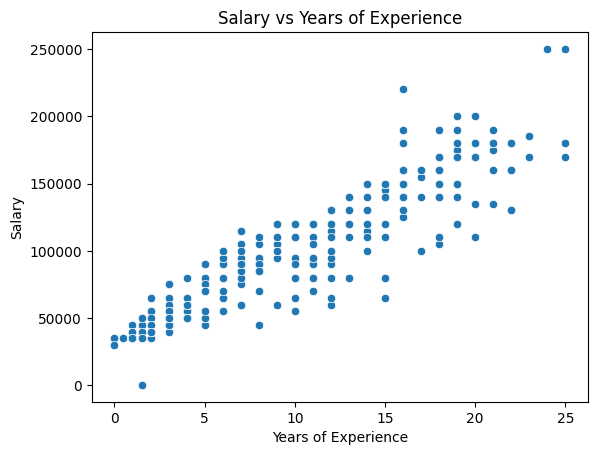

In [27]:
sns.scatterplot(x='Years of Experience', y='Salary', data=data)
plt.title('Salary vs Years of Experience')
plt.show()

In [28]:
print(data[['Years of Experience', 'Salary']].corr())

                     Years of Experience    Salary
Years of Experience             1.000000  0.930338
Salary                          0.930338  1.000000


In [30]:
X = data['Years of Experience']
y = data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 100)

In [31]:
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     1509.
Date:                Thu, 13 Nov 2025   Prob (F-statistic):          4.86e-110
Time:                        16:04:51   Log-Likelihood:                -2930.2
No. Observations:                 261   AIC:                             5864.
Df Residuals:                     259   BIC:                             5871.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.154e+04   2

In [32]:
intercept = model.params['const']
slope = model.params['Years of Experience']
print(f"Salary = {intercept:.2f} + {slope:.2f} × Years of Experience")

Salary = 31541.89 + 6906.91 × Years of Experience


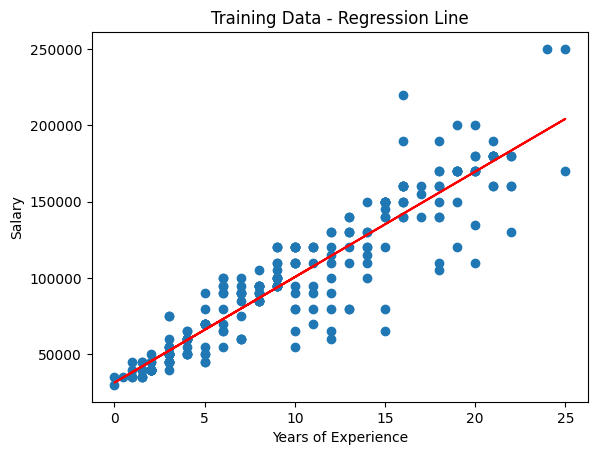

In [33]:
plt.scatter(X_train, y_train)
plt.plot(X_train, intercept + slope * X_train, 'r')
plt.title('Training Data - Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


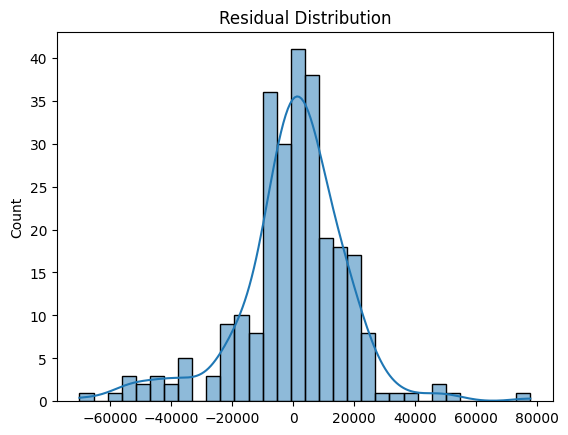

In [34]:

y_train_pred = model.predict(X_train_sm)
residual = y_train - y_train_pred
sns.histplot(residual, kde=True)
plt.title('Residual Distribution')
plt.show()

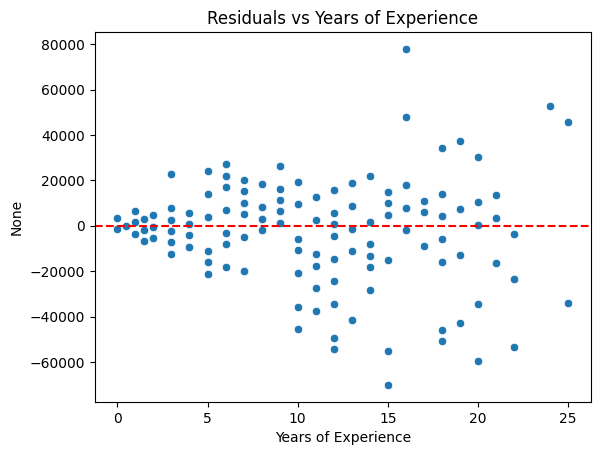

In [35]:
sns.scatterplot(x=X_train, y=residual)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Years of Experience')
plt.show()

In [36]:
X_test_sm = sm.add_constant(X_test)
y_pred = model.predict(X_test_sm)

In [37]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

RMSE: 16441.66
R² Score: 0.8905


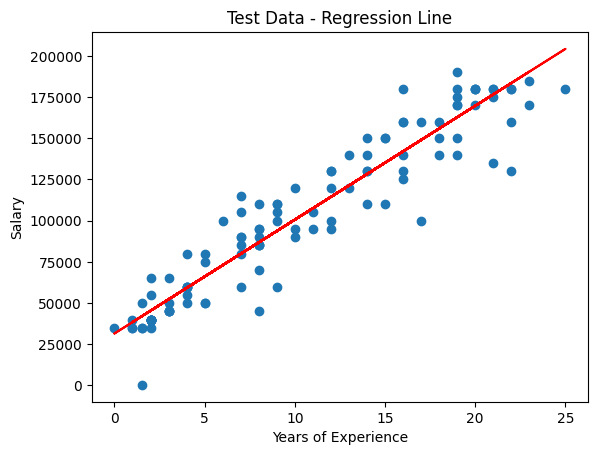

In [38]:
plt.scatter(X_test, y_test)
plt.plot(X_test, intercept + slope * X_test, 'r')
plt.title('Test Data - Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()